<a href="https://colab.research.google.com/github/gfuhrmann/Data-Projects/blob/main/G%C3%A1s_Natural_Nacional_Gustavo_Fuhrmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Produção de Gás Natural no Brasil**

## *1997 - 2022*

 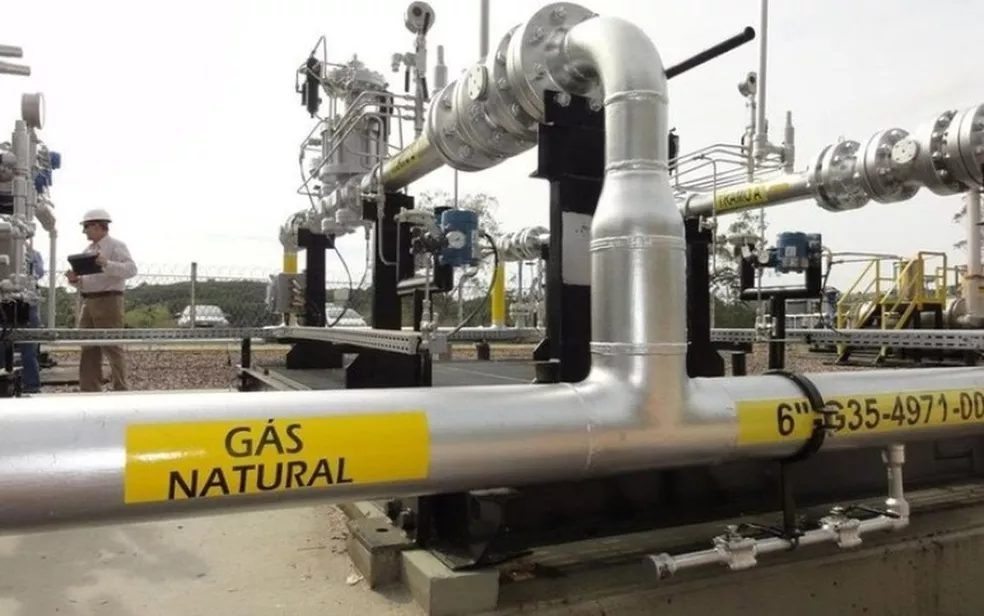

Baixar os dados: [Governo Federal](https://https://dados.gov.br/dataset?tags=g%C3%A1s+natural)

Utilizar o arquivo: [producao-gas-natural-1000m3-1997-2022](https://http://landpage-h.cgu.gov.br/dadosabertos/index.php?url=https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/ppgn-el/producao-gas-natural-1000m3-1997-2022.csv)

**por: @Gustavo Fuhrmann - [LinkedIn](https://https://www.linkedin.com/in/gustavo-fuhrmann-m-sc-77490329/)**

In [ ]:
# Projeto "Análise da Produção de Gás Natural no Brasil"

# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

In [ ]:
# Importando Dados
Base_de_dados = pd.read_csv('/content/producao-gas-natural-1000m3-1997-2022.csv', sep=';')

# Verificando
Base_de_dados.head()


,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,LOCALIZAÇÃO,PRODUÇÃO
0,1997,JAN,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,325655
1,1997,FEV,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,330876
2,1997,MAR,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,346070
3,1997,ABR,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,323297
4,1997,MAI,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,309287


In [ ]:
# Dimensão
Base_de_dados.shape


(6609, 7)

In [ ]:
# Nulos 
Base_de_dados.isnull().sum()


ANO                     0
MÊS                     0
GRANDE REGIÃO           0
UNIDADE DA FEDERAÇÃO    0
PRODUTO                 0
LOCALIZAÇÃO             0
PRODUÇÃO                0
dtype: int64

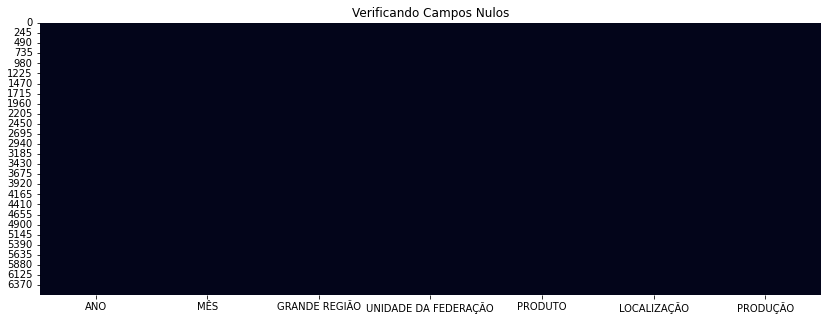

In [ ]:
# Nulos Gráfico
plt.figure (figsize=(14,5))
plt.title ('Verificando Campos Nulos' )
sns.heatmap (Base_de_dados.isnull(), cbar=False)

In [ ]:
# Estatiscas
Base_de_dados.describe()


,ANO,PRODUÇÃO
count,6609.000000,6.609000e+03
mean,2009.288546,9.800200e+04
std,7.262865,2.649453e+05
min,1997.000000,0.000000e+00
25%,2003.000000,0.000000e+00
50%,2009.000000,8.237000e+03
75%,2016.000000,6.637800e+04
max,2022.000000,2.925196e+06


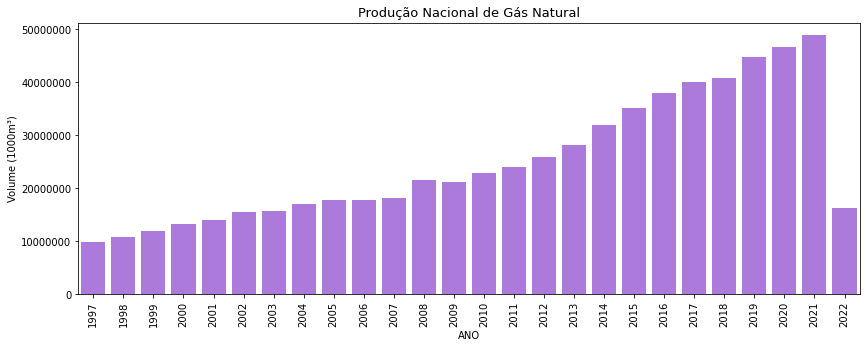

In [ ]:
# Tamanho da imagem
plt.figure( figsize=(14, 5) )

# Título
plt.title('Produção Nacional de Gás Natural', loc='center', fontsize=13 )

# Gráfico
sns.barplot( data=Base_de_dados, x='ANO', y='PRODUÇÃO', ci=None, color='#8A2BE2', estimator=sum, alpha=0.70 )

# Label
plt.ylabel('Volume (1000m³)');
plt.xticks (rotation=90);
plt.ticklabel_format(style='plain', axis='y')


In [ ]:
# Retirar o ano de 2022
Base_de_dados = Base_de_dados.loc[ ( Base_de_dados['ANO'] != 2022 ) ]

# Verificar
Base_de_dados.head()

,ANO,MÊS,GRANDE REGIÃO,UNIDADE DA FEDERAÇÃO,PRODUTO,LOCALIZAÇÃO,PRODUÇÃO
0,1997,JAN,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,325655
1,1997,FEV,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,330876
2,1997,MAR,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,346070
3,1997,ABR,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,323297
4,1997,MAI,REGIÃO SUDESTE,RIO DE JANEIRO,GÁS NATURAL,MAR,309287


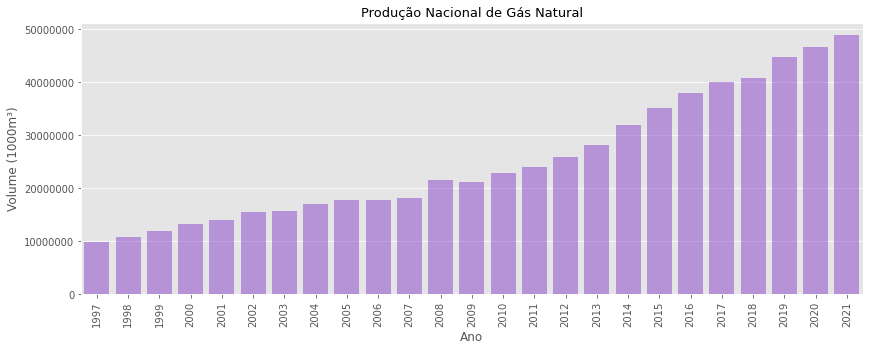

In [ ]:
# Tamanho da imagem
plt.figure( figsize=(14, 5) )

# Style
plt.style.use('ggplot')

# Título
plt.title('Produção Nacional de Gás Natural', loc='center', fontsize=13 )

# Gráfico
sns.barplot( data=Base_de_dados, x='ANO', y='PRODUÇÃO', ci=None, color='#8A2BE2', estimator=sum, alpha=0.50 )

# Label
plt.ylabel('Volume (1000m³)');
plt.xlabel('Ano');
plt.xticks (rotation=90);
plt.ticklabel_format(style='plain', axis='y')

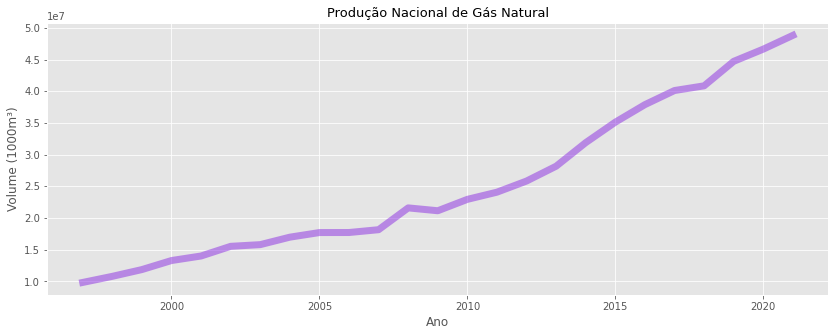

In [ ]:
# Tamanho da imagem
plt.figure( figsize=(14, 5) )

# Style
plt.style.use('ggplot')

# Grafico 2
plt.title( 'Produção Nacional de Gás Natural', loc='center', fontsize=13 )
sns.lineplot( data=Base_de_dados, x='ANO', y='PRODUÇÃO',ci=None, estimator='sum', lw=7, color='#8A2BE2', alpha=0.50);

# Labels
plt.xlabel('Ano');
plt.ylabel('Volume (1000m³)');

In [ ]:
Base_de_dados.groupby( by=['ANO'] ).sum()


,PRODUÇÃO
ANO,
1997,9824722
1998,10787604
1999,11855028
2000,13282875
2001,13998798
2002,15525153
2003,15792064
2004,16971158
2005,17699200


In [ ]:
# Análise
Análise_01 = Base_de_dados.groupby( by=['LOCALIZAÇÃO', 'ANO'] ).sum().reset_index()
Análise_01.head()

,LOCALIZAÇÃO,ANO,PRODUÇÃO
0,MAR,1997,6294109
1,MAR,1998,7037386
2,MAR,1999,7958314
3,MAR,2000,8050295
4,MAR,2001,8171251


In [ ]:
Análise_02 = Base_de_dados.groupby( by=['GRANDE REGIÃO', 'ANO'] ).sum().reset_index()
Análise_02.head()

,GRANDE REGIÃO,ANO,PRODUÇÃO
0,REGIÃO NORDESTE,1997,4303886
1,REGIÃO NORDESTE,1998,4540021
2,REGIÃO NORDESTE,1999,4649571
3,REGIÃO NORDESTE,2000,4873157
4,REGIÃO NORDESTE,2001,4831960


In [ ]:
Análise_03 = Base_de_dados.groupby( by=['UNIDADE DA FEDERAÇÃO', 'ANO'] ).sum().reset_index()
Análise_03.head()

,UNIDADE DA FEDERAÇÃO,ANO,PRODUÇÃO
0,ALAGOAS,1997,693593
1,ALAGOAS,1998,681929
2,ALAGOAS,1999,750011
3,ALAGOAS,2000,738338
4,ALAGOAS,2001,762922


In [ ]:
Análise_04 = Base_de_dados.groupby( by=['MÊS', 'ANO'] ).sum().reset_index()
Análise_04.head()

,MÊS,ANO,PRODUÇÃO
0,ABR,1997,818238
1,ABR,1998,873078
2,ABR,1999,968207
3,ABR,2000,1059862
4,ABR,2001,1116020


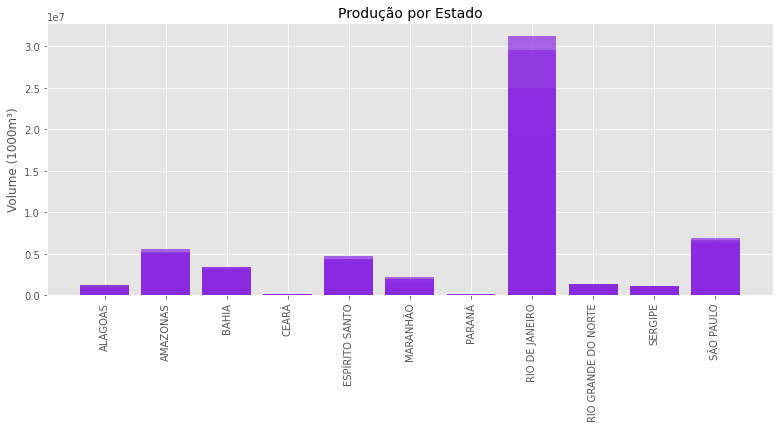

In [ ]:
# Tamanho
plt.figure( figsize=(13, 5) );

# Grafico
plt.title( 'Produção por Estado', loc='center', fontsize=14 );

# Grafico
plt.bar( Análise_03['UNIDADE DA FEDERAÇÃO'],Análise_03.PRODUÇÃO, color='#8A2BE2', alpha=0.70);


# Labels
plt.ylabel('Volume (1000m³)');

plt.xticks( rotation=90 );

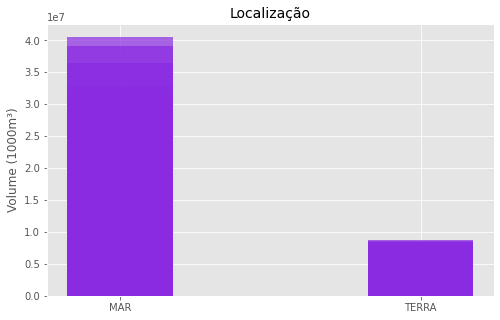

In [ ]:
# Tamanho
plt.figure( figsize=(8,5) );

# Grafico
plt.title( 'Localização', loc='center', fontsize=14 );

# Grafico
plt.bar( Análise_01['LOCALIZAÇÃO'],Análise_01.PRODUÇÃO, color='#8A2BE2', alpha=0.70,width=0.35);


# Labels
plt.ylabel('Volume (1000m³)');


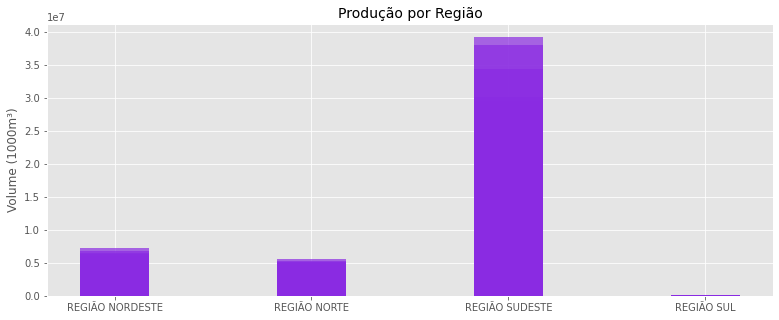

In [ ]:
# Tamanho
plt.figure( figsize=(13, 5) );

# Grafico
plt.title( 'Produção por Região', loc='center', fontsize=14 );

# Grafico
plt.bar( Análise_02['GRANDE REGIÃO'],Análise_02.PRODUÇÃO, color='#8A2BE2', alpha=0.70, width=0.35);


# Labels
plt.ylabel('Volume (1000m³)');


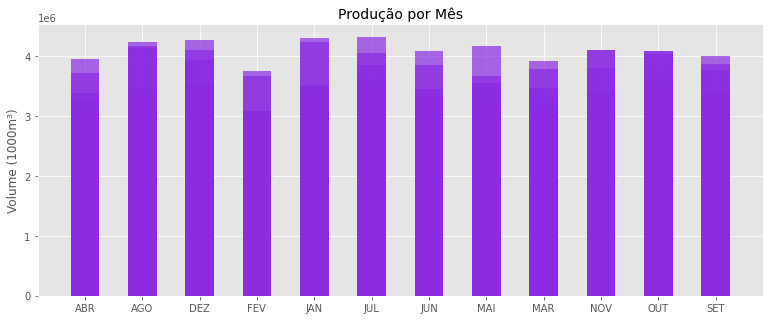

In [ ]:
# Tamanho
plt.figure( figsize=(13, 5) );

# Grafico
plt.title( 'Produção por Mês', loc='center', fontsize=14 );

# Grafico
plt.bar( Análise_04['MÊS'],Análise_04.PRODUÇÃO, color='#8A2BE2', alpha=0.70, width=0.5);


# Labels
plt.ylabel('Volume (1000m³)');

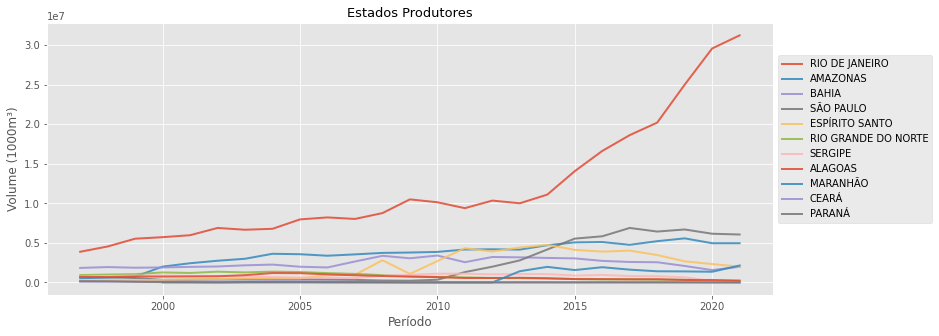

In [ ]:
# Informações mais complexas
Análise_10 = Análise_03.groupby( by=['UNIDADE DA FEDERAÇÃO'] ).sum().reset_index()[['UNIDADE DA FEDERAÇÃO', 'PRODUÇÃO']].sort_values( 'PRODUÇÃO', ascending=False )
Análise_10.head()

Lista_Estados = Análise_10['UNIDADE DA FEDERAÇÃO'].values

# Tamanho
plt.figure( figsize=(13, 5) )

# Grafico
plt.title( 'Estados Produtores', loc='center', fontsize=13 )

# Loop
for Coluna in Lista_Estados:
  
  # Filtrar o estado
  Filtro = Análise_03.loc[ Análise_03['UNIDADE DA FEDERAÇÃO'] == Coluna ]

  # Agrupar os valores para sumarizar 1
  Analise_Local = Filtro.groupby( by=['ANO'] ).sum().reset_index()

  # Plot
  sns.lineplot(data=Analise_Local, x='ANO', y='PRODUÇÃO', lw=2, alpha=0.85)

  # Labels
plt.xlabel('Período')
plt.ylabel('Volume (1000m³)')

# Legenda
plt.legend( Lista_Estados, bbox_to_anchor=(1, 0.9) )

In [ ]:
# Plot Geográfico

# Gerando os estados
Estados = Análise_10.sort_values('UNIDADE DA FEDERAÇÃO')['UNIDADE DA FEDERAÇÃO'].values

# Gerando os valores de Produção
Valores_Produção = Análise_10.sort_values('UNIDADE DA FEDERAÇÃO')['PRODUÇÃO'].values

# Latitudes
Lat = [ -9.62, -3.47, -13.49, -5.20, -19.19, -5.42, -24.89, -22.25, -5.81, -10.57, -22.19 ]

# Longitudes
Long = [ -36.82, -65.10, -41.71, -39.53, -40.34, -45.44, -51.55, -42.66, -36.59,  -37.45, -48.79]

# Organizados os dados
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Long,
    'Produção' : Valores_Produção
}

# Lendo o dicionario
Analise_Geografica = pd.DataFrame ( Dicionario )

Analise_Geografica.head()

,Estados,Latitude,Longitude,Produção
0,ALAGOAS,-9.62,-36.82,16557592
1,AMAZONAS,-3.47,-65.10,90353988
2,BAHIA,-13.49,-41.71,60860913
3,CEARÁ,-5.20,-39.53,1612432
4,ESPÍRITO SANTO,-19.19,-40.34,51870954


In [ ]:
## Coordenadas dos Estados (centrais)
# AL: [-9.62, -36.82], AM: [-3.47, -65.10], BA: [-13.29, -41.71], CE: [-5.20, -39.53], ES: [-19.19, -40.34], 
# MA: [-5.42, -45.44], PR: [-24.89, -51.55], RJ: [-22.25, -42.66], RN: [-5.81, -36.59],	SE: [-10.57, -37.45], SP: [-22.19, -48.79],


In [ ]:
# Fazendo o plot
import plotly.express as px

# Mapa de Calor Geografico
px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Produção',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=2.8,
    mapbox_style='stamen-terrain'
)